In [122]:
import sys
sys.path.append('../lib')
import numpy as np
import matplotlib.pyplot as plt
import basicfunc as func
import plotlib as plib

In [147]:
# Inputs

complexity = 'baseline'
mask = '0.7'

In [148]:
# Extract BmodeLike posterior

chi2_BmodeLike = np.load(f'../../BmodeLike/outputs/moments_{complexity}_{mask}_Nmt-fg_o1bts_adaptative/chi2s/moments_{complexity}_0.7_Nmt-fg_o1bts_adaptative_chi2.npy')
N_grid, _, Nsims = chi2_BmodeLike.shape
r_grid = np.linspace(0, 0.02, N_grid)

posterior_BmodeLike = np.exp(-1/2 * np.mean(chi2_BmodeLike, axis=-1))
posterior_BmodeLike /= max(posterior_BmodeLike)

# Extract Gaussian posterior

fits_Gauss = np.load(f'../best_fits/results_d{complexity[0]}s{complexity[0]}_0.7_Nmt-fg_gaussbeam_bandpass_ds_o1bts_fix1_adaptative.npy', allow_pickle=True).item()
Nbins, Nsims = fits_Gauss['r'].shape
r, sigma_r = plib.getr_analytical(fits_Gauss, Nmin=0, Nmax=Nbins)

posterior_Gauss = func.Gaussian(r_grid, r, sigma_r)
posterior_Gauss /= max(posterior_Gauss)

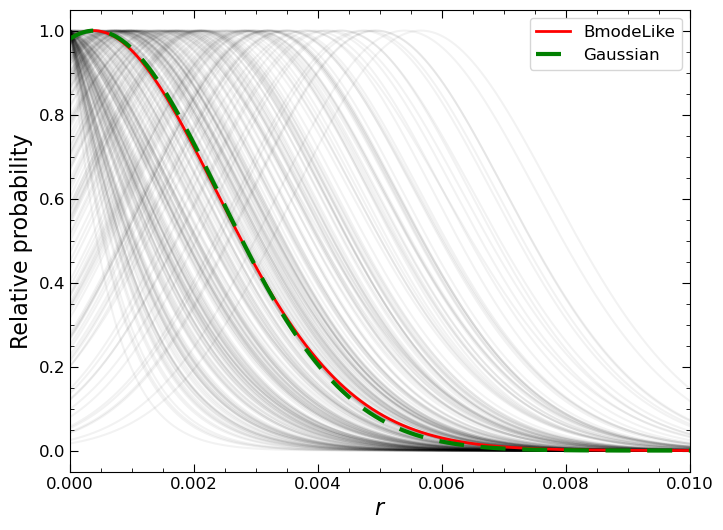

In [149]:
# Figure

fig, ax = plt.subplots(figsize=(8, 6))

for k in range(Nsims):
    L =  np.exp(-1/2 * chi2_BmodeLike[:,0,k])
    L /= max(L)
    ax.plot(r_grid, L, color='black', alpha=0.05)

ax.plot(r_grid, posterior_BmodeLike, linewidth=2, color='red', label='BmodeLike')
ax.plot(r_grid, posterior_Gauss, linewidth=3, linestyle=(0, (6,4)), color='green', label='Gaussian')
ax.set_xlabel(r'$r$', fontsize=16)
ax.set_ylabel('Relative probability', fontsize=16)
ax.set_xlim(0, 1e-2)
ax.minorticks_on()
ax.tick_params(right=True, top=True, direction='in', which='major', length=6)
ax.tick_params(right=True, top=True, direction='in', which='minor', length=3)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12, loc='upper right')
plt.show()

In [150]:
sigma_r

np.float64(0.0020201439666883594)

In [151]:
first_moment = np.sum(r_grid * posterior_Gauss) / np.sum(posterior_Gauss)
second_moment = np.sum(r_grid**2 * posterior_Gauss) / np.sum(posterior_Gauss)
np.sqrt(second_moment - first_moment**2)

np.float64(0.0012923943386599541)

In [152]:
r_test = np.linspace(-1, 1, 1000)
test = func.Gaussian(np.linspace(-1e-2, 1e-2, 1000), r, sigma_r)
first_moment = np.sum(r_test * test) / np.sum(test)
second_moment = np.sum(r_test**2 * test) / np.sum(test)
np.sqrt(second_moment - first_moment**2)

np.float64(0.2020116997448415)